# Chapter 11. Systems of Nonlinear Differential Equations

### Contents

* Autonomous Systems
* Stability of Linear Systems
* Linearization and Local Stability
* Autonomous Systems as Mathematical Models
* Periodic Solutions, Limit Cycles, and Global Stability

## 11.1 Autonomous Systems

A system of first-order differential equations is called **autonomous** when the system can be written in the form

>$
\begin{align*}
 \frac{dx_1}{dt} &=g_1(x_1,x_2,\cdots,x_n) \\ 
 \frac{dx_2}{dt} &=g_2(x_1,x_2,\cdots,x_n) \\ 
    & \;\vdots \\ 
 \frac{dx_n}{dt} &=g_n(x_1,x_2,\cdots,x_n)
\end{align*}
$

Notice that the independent variable $t$ does not appear explicitly on the right-hand side of each differential
equation.

* **Second-Order DE as a System**

  Any second-order differential equation $x''=g(x,x')$ can be written as an autonomous system. 
  If we let $y=x'$, the second-order differential equation becomes the system of two first-order equations
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= g(x,y) 
  \end{align*}
  $
  
  ---
  
  **Example:** The displacement angle $\theta$ for a pendulum satisfies the nonlinear second-order
  differential equation
  
  >$\displaystyle\frac{d^2 \theta}{dt^2} +\frac{g}{l}\sin\theta=0$
  
  If we let $x=\theta$ and $y=\theta'$, this second-order differential equation can be written as the autonomous system
  
  >$
  \begin{align*}
     x' &= y\\ 
     y' &= -\frac{g}{l}\sin x
  \end{align*}
  $

  ---
  
* **Plane Autonomous System**
  
  When $n=2$, the system is called a **plane autonomous system**, and we write the system as
  
  >$\displaystyle
  \begin{align*}
     \frac{dx}{dt} &= P(x,y)\\ 
     \frac{dy}{dt} &= Q(x,y)
  \end{align*}
  $
  
  If $P(x,y)$, $Q(x,y)$, and the first-order partial derivatives $\partial P/\partial x$,
  $\partial P/\partial y$, $\partial Q/\partial x$, and $\partial Q/\partial y$ are continuous in a
  region $R$ of the plane, then a solution to the plane autonomous system that satisfies 
  $\mathbf{x}(0)=\mathbf{x}_0$ is unique and one of three basic types:
  
    * A **constant solution**, $\mathbf{x}(t)=\mathbf{x}_0$ for all $t$. 
    A constant solution is called a **critical** or **stationary point**. Note that since $\mathbf{x}'=\mathbf{0}$,
    a critical point is a solution of the system of algebraic equations
    
    >$\displaystyle
      \begin{align*}
         P(x,y) &= 0\\ 
         Q(x,y) &= 0
      \end{align*}
    $
    
    * An **arc**, $\mathbf{x}(t)$ - a plane curve that does not cross itself
    
    <img src="figures/ch11_figure01.png" width="200">
    
    * A **periodic solution** or **cycle**, $\mathbf{x}(t +p)=\mathbf{x}(t)$
    
    <img src="figures/ch11_figure02.png" width="100"> 

**Example:** Find all criticl points of the following plane autonomous system

>$
\begin{align*}
 x'&= x^2 +y^2 -6\\ 
 y'&= x^2 -y 
\end{align*}
$

### Exercises 11.1

* 1

## 11.2 Stability of Linear Systems

If $\mathbf{x}_1$ is a critical point of a plane autonomous system and $\mathbf{x}=\mathbf{x}(t)$ is a solution
satisfying $\mathbf{x}(0)=\mathbf{x}_0$, 

when $\mathbf{x}_0$ is placed near $\mathbf{x}_1$.

<img src="figures/ch11_figure03.png" width="150">

**(a)** It may return to the critical point <br>
**(b)** It may remain close to the critical point without returning <br>
**(c)** It may move away from the critical point

* **Stability Analysis**

  A careful geometric analysis of the solutions to the *linear* plane autonomous system
  
  >$
    \begin{align*}
       x'&= ax +by\\ 
       y'&= cx +dy
    \end{align*}
   $
  
  in terms of the eigenvalues and eigenvectors of the coefficient matrix
  
  >$\mathbf{A}=
    \begin{pmatrix}
     a & b\\ 
     c & d
    \end{pmatrix}
   $
   
  drives the stabilty analysis. 
  
  To ensure that $\mathbf{x}_0=(0,\,0)$ is the only critical point,
  we will assume that the determinant $\Delta = ad -bc \neq 0$. If $\tau = a + d$ is the trace of matrix $\mathbf{A}$,
  then the characteristic equation $\mathrm{det}(\mathbf{A} -\lambda\mathbf{I})=0$ can be rewritten as
  
  >$\lambda^2 -\tau\lambda +\Delta =0$
  
  Therefore the eigenvalues of $\mathbf{A}$ are 
  
  >$\displaystyle\lambda =\frac{\tau \pm \sqrt{\tau^2 -4\Delta}}{2}$
  
  and the usual three cases for these roots occur according to whether $\tau^2 -4\Delta$ is positive, negative,
  or zero.

---

**Example:** Find the eigenvalues of the linear system

>$
    \begin{align*}
       x'&= -x +y\\ 
       y'&= cx -y
    \end{align*}
 $
 
in terms of $c$, and use a numerical solver to discover the shapes of solutions corresponding to the cases
$c=\frac{1}{4}$, $4$, $0$, and $-9$. $\mathbf{A}$ has trace $\tau=-2$ and determinant $\Delta=1 -c$, 
and so the eigenvalues are

>$
  \lambda =-1 \pm \sqrt{c}
 $
 
The nature of the eigenvalues is therefore determined by the value of $c$ 

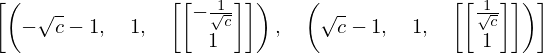

In [1]:
%matplotlib inline
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

sp.init_printing(use_unicode=True)

c = sp.Symbol('c')
A = sp.Matrix([[-1, 1], [c, -1]])
A.eigenvects()

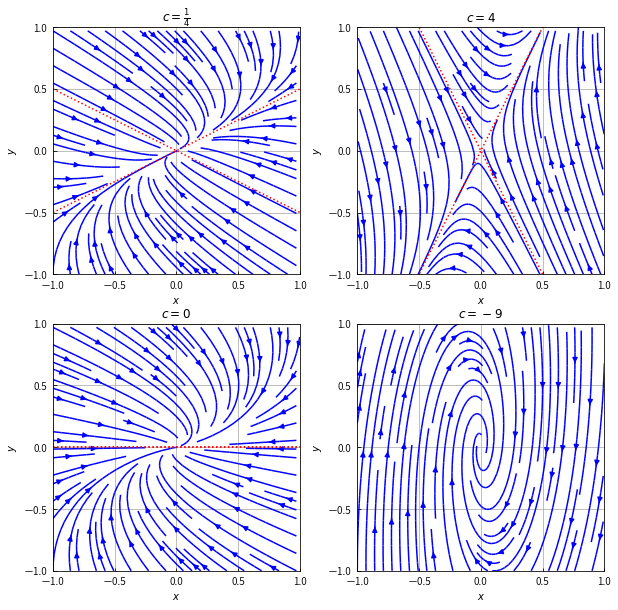

In [2]:
w = 1
xp = np.linspace(-w, w, 50)
yp = np.linspace(-w, w, 50)
x, y = np.meshgrid(xp, yp)

c_ = np.array([1/4, 4, 0, -9])
c_title = [r'$c=\frac{1}{4}$', r'$c=4$', r'$c=0$', r'$c=-9$']

fig = plt.figure(figsize=(10, 10))

for i in range(4):
    
    ax = fig.add_subplot(2, 2, i +1)

    xdot = -x +y
    ydot = c_[i]*x -y
    
    if c_[i] >= 0.0:
        y_1 = -np.sqrt(c_[i])*xp
        y_2 = np.sqrt(c_[i])*xp
        ax.plot(xp, y_1, 'r:', xp, y_2, 'r:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(c_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=6)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))

    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')     

---

Trajectory behaviors in phase portraits can be explained with eigenvalue-eigenvector of $\mathbf{A}$

#### **Real Distinct Eigenvalues** ($\tau^2 -4\Delta > 0$)

>$
\begin{align*}
 \mathbf{x}(t)&= c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_2 t}\\ 
 &\;\big\Downarrow \;\lambda_1 >\lambda_2\\ 
 &= e^{\lambda_1 t} \left[c_1\mathbf{k}_1 +c_2\mathbf{k}_2 e^{(\lambda_2 -\lambda_1)t} \right ] \\
 &\;\big\Downarrow \;\,t \to \infty\\
 &\simeq c_1\mathbf{k}_1 e^{\lambda_1 t}
\end{align*}
 $
 
* **Both eigenvalues negative** ($\tau^2 -4\Delta > 0$, $\tau<0$, $\Delta>0$) 
   
  **Stable Node:** Since both eigenvalues are negative, it follows that 
  $\lim_{t \to \infty} \mathbf{x}(t)=\mathbf{0}$ in the direction of $\mathbf{k}_1$ when $c_1 \neq 0$ or
  in the direction of $\mathbf{k}_2$ when $c_1=0$
    
* **Both eigenvalues positive** ($\tau^2 -4\Delta > 0$, $\tau>0$, $\Delta>0$)
   
   **Unstable Node:** $\mathbf{x}(t)$ becomes unbounded in the direction of 
   $\mathbf{k}_1$ when $c_1 \neq 0$ or in the direction of $\mathbf{k}_2$ when $c_1=0$ 
   
* **Eigenvalues have opposite signs** ($\tau^2 -4\Delta > 0$, $\Delta<0$)
   
   **Saddle Point:** When $c_1=0$, $\mathbf{x}(t)$ will approach $\mathbf{0}$ along the line determined by 
   $\mathbf{k}_2$. If $\mathbf{x}(0)$ does not lie on the line determined by $\mathbf{k}_2$, the direction
   determined by $\mathbf{k}_1$ serves as an asymtote for $\mathbf{x}(t)$ 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ as either a stable node, an unstable node, or a saddle point

>(a) $\begin{pmatrix} -2 & -2\\ -2 & -5 \end{pmatrix}$, $\;$
(b) $\begin{pmatrix} -1 & -2\\ \;\;3 & \;\;4 \end{pmatrix}$, $\;$
(c) $\begin{pmatrix} 2 & -1\\ 3 & -2 \end{pmatrix}$

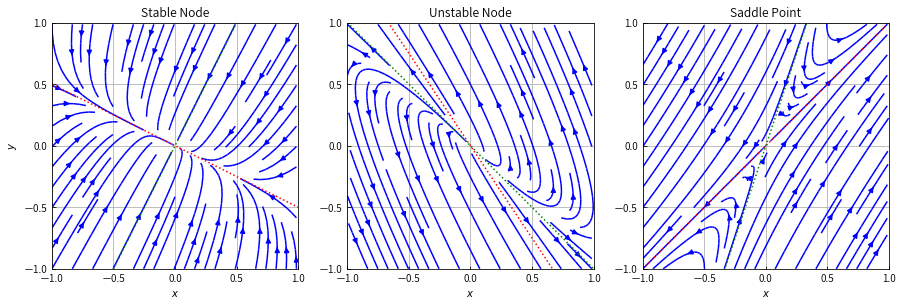

In [3]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[-2, -2], [-2, -5]],[[-1, -2], [3, 4]],[[2, -1], [3, -2]]])
A_title = ['Stable Node', 'Unstable Node', 'Saddle Point']

fig = plt.figure(figsize=(15, 5))

for i in range(3):
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])

    if lamda[0] >= lamda[1]:
        y_1 = v[1,0]/v[0,0]*xp
        y_2 = v[1,1]/v[0,1]*xp
    else:
        y_1 = v[1,1]/v[0,1]*xp
        y_2 = v[1,0]/v[0,0]*xp       

    ax = fig.add_subplot(1, 3, i +1)
    
    ax.plot(xp, y_1, 'r:', xp, y_2, 'g:')    
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

#### **A Repeated Real Eigenvalue** ($\tau^2 -4\Delta = 0$)

The general solution takes on one of two different forms depending on whether **one** or **two** linearly independent
eigenvectors can be found for the repeated eigenvalues $\lambda_1$

* **Two linearly independent eigenvectors**

  If $\mathbf{k}_1$ and $\mathbf{k}_2$ are two linearly independent eigenvectors corresponding to $\lambda_1$,
  then the general solution is given by
  
  >$\mathbf{x}(t)=c_1\mathbf{k}_1 e^{\lambda_1 t} +c_2\mathbf{k}_2 e^{\lambda_1 t}=
    \left(c_1\mathbf{k}_1 + c_2\mathbf{k}_2 \right) e^{\lambda_1 t}$
   
  If $\lambda_1<0$, the $\mathbf{x}(t)$ approaches $\mathbf{0}$ along the line determined by the vector
  $c_1\mathbf{k}_1 + c_2\mathbf{k}_2$ and the critical point is a **degenerate stable node**.
  The arrows are reversed when $\lambda_1>0$, and the critical point is a **degenerate unstable node**
  
* **A single linearly independent eigenvectors**
  
  When only a single linearly independent eigenvector $\mathbf{k}_{11}$ exists, the general solution is 
  given by
  
  >$\begin{align*}
     \mathbf{x}(t)&=c_1\mathbf{k}_{11} e^{\lambda_1 t} +c_2\left(\mathbf{k}_{11} te^{\lambda_1 t} 
            +\mathbf{k}_{12} e^{\lambda_1 t}\right)\\
         &=te^{\lambda_1 t}\left[c_2 \mathbf{k}_{11} +\frac{1}{t} \left(c_1\mathbf{k}_{11} 
            +c_2\mathbf{k}_{12}\right) \right]
    \end{align*}$
    
  where $(\mathbf{A} -\lambda_1\mathbf{I})\mathbf{k}_{12}=\mathbf{k}_{11}$. 
  If $\lambda_1<0$, then $\lim_{t \to \infty} te^{\lambda_1 t}=0$ and it follows that $\mathbf{x}(t)$
  approaches $\mathbf{0}$ in the line determined by $\mathbf{k}_{11}$. The critical point is
  again a **degenerate stable node**. When $\lambda_1>0$, $\mathbf{x}(t)$ becomes unbounded as $t$ increases, 
  and the critical point is a **degenerate unstable node** 

---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ 

>(a) $\begin{pmatrix} 1 & 0\\ 0 & 1 \end{pmatrix}$, $\;$
(b) $\begin{pmatrix} 3 & -18\\ 2 &\; -9 \end{pmatrix}$, $\;$
(c) $\begin{pmatrix} \;\;2 & 4\\ -1 & 6 \end{pmatrix}$

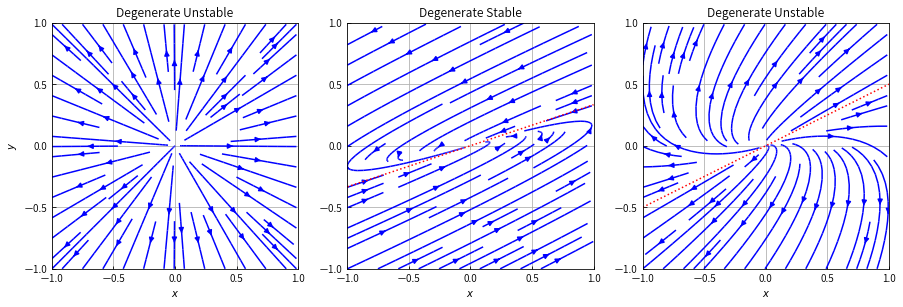

In [4]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[1, 0], [0, 1]],[[3, -18], [2, -9]],[[2, 4], [-1, 6]]])
A_title = ['Degenerate Unstable', 'Degenerate Stable', 'Degenerate Unstable']

fig = plt.figure(figsize=(15, 5))

for i in range(3):

    ax = fig.add_subplot(1, 3, i +1)
    
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])
    
    if i != 0:
        y_1 = v[1,0]/v[0,0]*xp
        ax.plot(xp, y_1, 'r:')
            
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

---

#### **Complex Eigenvalues** ($\tau^2 -4\Delta < 0$)

If $\lambda_1=\alpha +i\beta$ and $\bar{\lambda}_1$ are the complex eigenvalues and 
$\mathbf{k}_1=\mathbf{b}_1 +i\mathbf{b}_2$ is a complex eigenvector corresponding to $\lambda_1$,
the general solution can be written as $\mathbf{x}=c_1\mathbf{x}_1 +c_2\mathbf{x}_2$

>$\mathbf{x}_1(t)=e^{\alpha t}\left(\mathbf{b}_1\cos\beta t -\mathbf{b}_2\sin\beta t\right)\;$ and 
 $\;\mathbf{x}_2(t)=e^{\alpha t}\left(\mathbf{b}_2\cos\beta t +\mathbf{b}_1\sin\beta t\right)$
 
* **Pure imaginary roots** ($\tau^2 -4\Delta < 0$, $\tau=0$)

  **Center:** When $\alpha=0$, all solutions are ellipses with center at the origin and are periodic 
  with period $p=2\pi/\beta$. The critical point is called a **center**
  
* **Nonezero real part** ($\tau^2 -4\Delta < 0$, $\tau\neq 0$)  

  **Spiral Point:** When $\alpha<0$, $e^{\alpha t \to 0}$, and the elliptical-like solution spirals closer
  and closer to the origin. The critical point is called a **stable spiral point**. When $\alpha>0$, the 
  effect is the opposite. An elliptical-like solution is driven farther and farther from the origin,
  and the critical point is now called an **unstable spiral point**


---

**Example:** Classify the critical point $(0,0)$ of each of the following linear system 
$\mathbf{x}'=\mathbf{A}\mathbf{x}$ 

>(a) $\begin{pmatrix} -1 & 2\\ -1 & 1 \end{pmatrix}$,$\;$
(b) $\begin{pmatrix} -1 & -4\\ \;\;1 & -1 \end{pmatrix}$

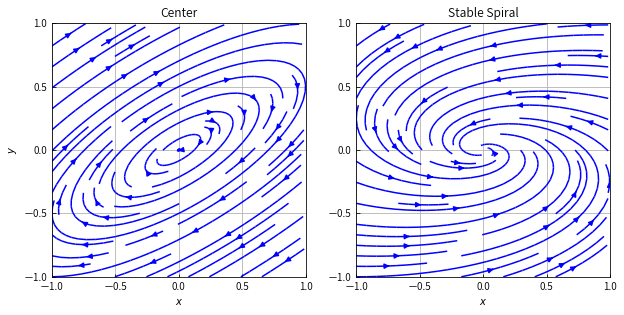

In [5]:
w = 1
xp = np.linspace(-w, w, 6)
yp = np.linspace(-w, w, 6)
x, y = np.meshgrid(xp, yp)

A = np.array([[[-1, 2], [-1, 1]],[[-1, -4], [1, -1]]])
A_title = ['Center', 'Stable Spiral']

fig = plt.figure(figsize=(10, 5))

for i in range(2):

    ax = fig.add_subplot(1, 2, i +1)
    
    xdot = A[i,0,0]*x +A[i,0,1]*y
    ydot = A[i,1,0]*x +A[i,1,1]*y

    lamda, v = np.linalg.eig(A[i])
            
    ax.streamplot(x, y, xdot, ydot, color='blue')

    ax.set_title(A_title[i])

    ax.axis((-w, w, -w, w))
    ax.set_aspect(aspect='equal')
    ax.grid()
    
    ax.tick_params(axis='both', direction='in', pad=5)     
    ax.xaxis.set_ticks(np.linspace(-w, w, 5))
    ax.set_xlabel(r'$x$')
    
    ax.yaxis.set_ticks(np.linspace(-w, w, 5))
    if i == 0:
        ax.set_ylabel(r'$y$')

<img src="figures/ch11_figure04.png" width="500">

For a linear plane autonomous system $\mathbf{x}'=\mathbf{A}\mathbf{x}$ with $\mathrm{det}\,\mathbf{A}\neq 0$,
let $\mathbf{x}$ denote the solution that satisfies the initial condition $\mathbf{x}(0)=\mathbf{x}_0$, where
$\mathbf{x}_0\neq\mathbf{0}$

1. $\lim_{t \to \infty}\mathbf{x}(t)=\mathbf{0}$ if and only if the eigenvalues of $\mathbf{A}$ have negative
   real parts. This will occur when $\Delta>0$ and $\tau<0$
1. $\mathbf{x}(t)$ is periodic if and only if the eigenvalues of $\mathbf{A}$ are pure imaginary. This will
   occur when $\Delta>0$ and $\tau=0$
1. In all other cases, given any neighborhood of the origin, there is at least one $\mathbf{x}_0$ in the neighborhood  
   for which $\mathbf{x}(t)$ becomes unbounded as $t$ increases

### Exercises 11.2

* 1

## 11.3 Linearization and Local Stability

Here we will use linearization as a means of analyzing nonlinear DEs and nonlinear systems; the idea is to replace them
by linear DEs and linear systems

Let $\mathbf{x}_1$ be a critical point of an autonomous system, and let $\mathbf{x}=\mathbf{x}(t)$ denote the solution
that satisfies the initial condition $\mathbf{x}(0)=\mathbf{x}_0$, where $\mathbf{x}\neq\mathbf{x}_1$.

* $\mathbf{x}_1$ is a **stable critical point**
  
  when, given any $\rho > 0$, there is a $r>0$ such that if $\mathbf{x}_0$ satisfies $|\mathbf{x}_0 -\mathbf{x}_1|<r$,
  then $\mathbf{x}(t)$ satisfies $|\mathbf{x}(t) -\mathbf{x}_1|<\rho$ for all $t>0$. If, in addition, 
  $\lim_{t \to \infty} \mathbf{x}(t)=\mathbf{x}_1$ whenever $|\mathbf{x}_0 -\mathbf{x}_1|<r$, we call
  $\mathbf{x}_1$ an **asymptotically stable critical point**
  
* $\mathbf{x}_1$ is a **unstable critical point**

  if there is $\rho>0$ with the property that, for any $r>0$, there is at least one $\mathbf{x}_0$ that
  satisfies $|\mathbf{x}_0 -\mathbf{x}_1|<r$, yet the corresponding solution $\mathbf{x}(t)$ satisfies 
  $|\mathbf{x}(t) -\mathbf{x}_1|\geq\rho$ for at least one $t>0$

---
**Example:** Show that $(0,0)$ is a stable critical point of the nonlinear plane autonomous system

>$
\begin{align*}
  x' &= -y -x\sqrt{x^2 +y^2}\\ 
  y' &= x -y\sqrt{x^2 +y^2}
\end{align*}
$

From the formulas $r^2=x^2 +y^2$ and $\theta=\tan^{-1}(y/x)$, we obtain

>$\displaystyle
  \frac{dr}{dt}=\frac{1}{r}\left(x\frac{dx}{dt}+y\frac{dy}{dt} \right),\;
  \frac{d\theta}{dt}=\frac{1}{r^2}\left( -y\frac{dx}{dt} +x\frac{dy}{dt}\right)$
  
Substituting for $dx/dt$ and $dy/dt$ in the expressions for $dr/dt$ and $d\theta/dt$, we obtain

>$
\begin{align*}
  \frac{dr}{dt} &= -r^2\\ 
  \frac{d\theta}{dt} &= 1
\end{align*}
$

Using separation of variables, we see that the solution of the system is

>$\displaystyle r=\frac{1}{t +c_1},\;\;\theta=t +c_2$

for $r\neq 0$. If $\mathbf{x}(0)=(r_0,\theta_0)$ is the initial condition in polar coordinates, then

>$\displaystyle r=\frac{r_0}{r_0 t +1},\;\;\theta=t +\theta_0$

Note that $r\leq r_0$ for $t\geq 0$, and $r$ approaches $0$ as $t$ increases. Therefore, given $\rho>0$,
a solution that starts less than $\rho$ from the origin remains within $\rho$ of the origin for all $t\geq 0$.
Hence the critical point $(0,0)$ is asymptotically stable

---
**Example:** When expressed in polar coordinates, a plane autonomous system takes the form

>$
\begin{align*}
  \frac{dr}{dt} &= 0.05\,r(3 -r)\\ 
  \frac{d\theta}{dt} &= -1
\end{align*}
$

Show that $(x,y)=(0,0)$ is unstable critical point

We see that $dr/dt=0$ when $r=0$ and can conclude that $(x,y)=(0,0)$ is a critical point. The differential
equation can be solved using separation of variables. If $r(0)=r_0$ and $r_0\neq 0$, then

>$\displaystyle r=\frac{3}{1 +c_0 e^{-0.15t}}$

where $c_0=(3 -r_0)/r_0$. Since

>$\displaystyle\lim_{t \to \infty}\frac{3}{1 +c_0 e^{-0.15t}}=3$,

it follows that no matter how close to $(0,0)$ a solution starts, the solution will leave a disk of radius $\epsilon$
about the origin. Therefore $(0,0)$ is an unstable critical point

---

#### **Linearization**

We replace the term $\mathbf{g}(\mathbf{x})$ in the original autonomous system $\mathbf{x}'=\mathbf{g}(\mathbf{x})$
by a linear term $\mathbf{A}(\mathbf{x} -\mathbf{x}_1)$ that most closely approximates $\mathbf{g}(\mathbf{x})$
in a neighborhood of $\mathbf{x}_1$. This replacement process is called **linearization**

When $\mathbf{x}_1$ is a critical point of a plane autonomous system

>$
\begin{align*}
 x' &= P(x,y)\\ 
 y' &= Q(x,y)
\end{align*}
$,

$P(x_1,y_1)=Q(x_1,y_1)=0$ and we have

>$
\begin{align*}
 x' &= P(x,y)\simeq \left.\frac{\partial P}{\partial x}\right|_{(x_1,y_1)}(x -x_1)
         +\left.\frac{\partial P}{\partial y}\right|_{(x_1,y_1)}(y -y_1)\\ 
 y' &= Q(x,y)\simeq \left.\frac{\partial Q}{\partial x}\right|_{(x_1,y_1)}(x -x_1)
         +\left.\frac{\partial Q}{\partial y}\right|_{(x_1,y_1)}(y -y_1)
\end{align*}
$

The original system $\mathbf{x}'=\mathbf{g}(\mathbf{x})$ may be approximated in a neighborhood of $\mathbf{x}_1$
by the linear system $\mathbf{x}'=\mathbf{A}(\mathbf{x} -\mathbf{x}_1)$, where

>$\displaystyle\mathbf{A}=
\begin{pmatrix}
 \left.\frac{\partial P}{\partial x}\right|_{(x_1,y_1)} & \left.\frac{\partial P}{\partial y}\right|_{(x_1,y_1)}\\ 
 \left.\frac{\partial Q}{\partial x}\right|_{(x_1,y_1)} & \left.\frac{\partial Q}{\partial y}\right|_{(x_1,y_1)}
\end{pmatrix}
$

#### **Stability Criteria for Plane Autonomous System**

1. If the eigenvalues of $\mathbf{A}=\mathbf{g}'(\mathbf{x}_1)$ have negative real part, then $\mathbf{x}_1$ is 
   an asymptotically stable critical point
1. If the eigenvalues of $\mathbf{A}=\mathbf{g}'(\mathbf{x}_1)$ have positive real part, then $\mathbf{x}_1$ is 
   an unstable critical point   

**Example:** Classify the criticl points of the following plane autonomous system

>$
\begin{align*}
 x'&= x^2 +y^2 -6\\ 
 y'&= x^2 -y 
\end{align*}
$

The critical points are $(\sqrt{2},2)$ and $(-\sqrt{2},2)$, the Jocobian matrix is

>$
\mathbf{g}'(\mathbf{x})=
\begin{pmatrix}
 2x & 2y\\ 
 2x &-1 
\end{pmatrix}
$

and so

>$
\mathbf{A}_1=\mathbf{g}'((\sqrt{2},2))=
\begin{pmatrix}
 2\sqrt{2} & \;\;4\\ 
 2\sqrt{2} &-1 
\end{pmatrix}\;
$ and
>$\;
\mathbf{A}_2=\mathbf{g}'((-\sqrt{2},2))=
\begin{pmatrix}
 -2\sqrt{2} & \;\;4\\ 
 -2\sqrt{2} &-1 
\end{pmatrix}
$

Since the determinant of $\mathbf{A}_1$ is negative, $\mathbf{A}_1$ has a positive real eigenvalue.
Therefore $(\sqrt{2},2)$ is an unstable critical point. $\mathbf{A}_2$ has a positive determinant and 
a negative trace, and so both eigenvalues have negative real parts. It follows that $(-\sqrt{2},2)$ is a
stable critical point

#### Classifying Critical Points

<img src="figures/ch11_figure05.png" width="500">

**Example:** The second-order differential equation $mx'' +kx +k_1x^3 =0$, for $k>0$, represents a general
model for the free, undamped oscillations of a mass $m$ attached to a nonlinear spring.
If $k=1$ and $k_1=-1$, the spring is called soft and the plane autonomous system corresponding to the 
nonlinear second-order equation $x'' +x -x^3=0$ is

>$
\begin{align*}
 x'&= y\\ 
 y'&= x^3 -x
\end{align*}
$

Find and classify the critical points

Since $x^3 -x =x(x^2 -1)$, the critical points are $(0,0)$, $(1,0)$, and $(-1,0)$. The corresponding
Jocobian matrices are

>$
\mathbf{A}_1=\mathbf{g}'((0,0))=
\begin{pmatrix}
 \;\;0 & 1\\ 
 -1 & 0  
\end{pmatrix}\;
$ and
>$\;
\mathbf{A}_2=\mathbf{g}'((1,0))=\mathbf{g}'((0,1))
\begin{pmatrix}
  0 & 1\\ 
  2 & 0 
\end{pmatrix}
$

Since $\mathrm{det}\,\mathbf{A}_2<0$, critical points $(1,0)$ and $(-1,0)$ are both saddle points. The eigenvalues
of $\mathbf{A}_1$ are $\pm i$, and the status of the critical points at $(0,0)$ remains in doubt. It may be
either a stable spiral, an unstable spiral, or a center

#### **Phase-Plane Method**

The linearization method can provide useful information on the local behavior of solutions near critical points.
It is of little help if we are interested in solutions whose initial condition $\mathbf{x}(0)=\mathbf{x}_0$ is not
close to a critical point or if we wish to obtain a global view of the family of solution curves. The 
**phase-plane method** is based on the fact that

>$\displaystyle\frac{dy}{dx}=\frac{dy/dt}{dx/dt}=\frac{Q(x,y)}{P(x,y)}$

and it attempts to find $y$ as a function of $x$ using one of the methods available for solving first-order DEs

**Example:** Use the phase-plane method to determine the nature of the solutions to $x'' +x -x^3 =0$ in a
neighborhood of $(0,0)$

If we let $dx/dt=y$, then $dy/dt=x^3 -x$. From this we obtain the first-order DE

>$\displaystyle\frac{dy}{dx}=\frac{x^3 -x}{y}$

which can be solved by separation of variables. Integrating gives

>$\displaystyle\frac{y^2}{2}=\frac{x^4}{4}-\frac{x^2}{2}+c$

After completing the square, we can write the solution as $y^2=(x^2 -1)^2/2 +c_0$.
If $\mathbf{x}(0)=(x_0,0)$, where $0<x_0<1$, then $c_0=-(x_0^2-1)^2/2$, and so

>$\displaystyle y^2=\frac{(x^2 -1)^2}{2} -\frac{(x_0^2 -1)^2}{2}=\frac{(2 -x^2 -x_0^2)(x_0^2 -x^2)}{2}$

Note that $y=0$ when $x=-x_0$. In addition, the right-hand side is positive when $-x_0<x<x_0$, and
so each $x$ has two corresponding values of $y$. The solution $\mathbf{x}(t)$ that satisfies $\mathbf{x}(0)=(x_0,0)$
is therefore periodic, and so $(0,0)$ is a center

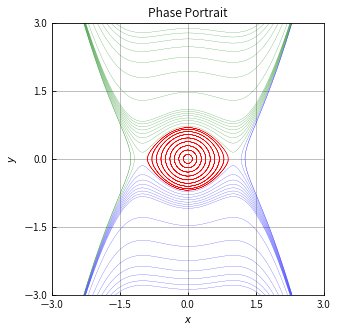

In [6]:
from scipy.integrate import solve_ivp

def myODE(t, y):
    return [y[1], y[0]**3 -y[0]]

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

td = 50
x0 = 0
for i in range(9):
    x0 = x0 +0.1
    sol = solve_ivp(myODE, [0, td], [x0, 0], t_eval = np.linspace(0, td, 200))    
    ax.plot(sol.y[0], sol.y[1], 'r-', linewidth = 0.2)

x0 = 1.5
for i in range(8):
    x0 = x0 +0.1
    sol = solve_ivp(myODE, [0, td], [x0, -3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 0.2)     
    
x0 = 2.25
for i in range(10):
    x0 = x0 +0.005
    sol = solve_ivp(myODE, [0, td], [x0, -3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'b-', linewidth = 0.2)    

x0 = -1.5
for i in range(8):
    x0 = x0 -0.1
    sol = solve_ivp(myODE, [0, td], [x0, 3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'g-', linewidth = 0.2)     
    
x0 = -2.25
for i in range(10):
    x0 = x0 -0.005
    sol = solve_ivp(myODE, [0, td], [x0, 3], t_eval = np.linspace(0, td, 2000))    
    ax.plot(sol.y[0], sol.y[1], 'g-', linewidth = 0.2) 
    
ax.set_title('Phase Portrait')

w = 3
ax.axis((-w, w, -w, w))
ax.set_aspect(aspect='equal')
ax.grid()
   
ax.tick_params(axis='both', direction='in', pad=5)     
ax.xaxis.set_ticks(np.linspace(-w, w, 5))
ax.set_xlabel(r'$x$')
ax.yaxis.set_ticks(np.linspace(-w, w, 5))
ax.set_ylabel(r'$y$')
plt.show()

### Exercises 11.3

* 1

## 11.4 Autonomous Systems as Mathematical Models